In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [25]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [26]:
df.duplicated().sum()

107

In [27]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [28]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# **Categorials**

In Categoricals we use **value_counts()**

ٹائٹینک پر سوار والدین/بچوں کا

0 means:
678 single people without family (parents OR children) but some change to have sibsp

In [29]:
df['parch'].value_counts()   # (normalize=True)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

ٹائٹینک پر سوار بہن بھائیوں / میاں بیوی کا


0: 608 single peoples without any family members

In [30]:
df['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [33]:
df['family_size'] = df['sibsp'] + df['parch']

In [34]:
df.family_size.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_size, dtype: int64

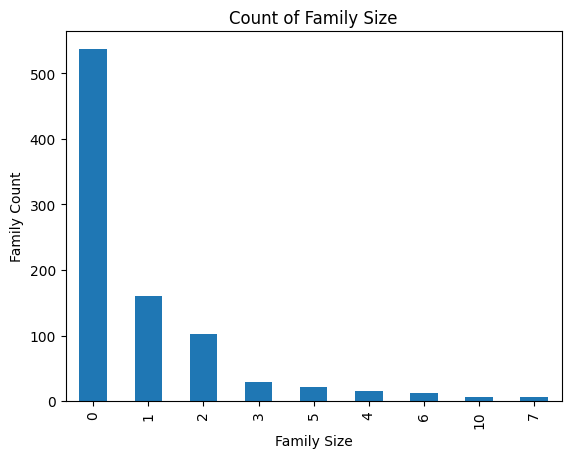

In [38]:
df.family_size.value_counts().plot(kind='bar')
plt.title('Count of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Family Count')
plt.show()

# **Numaric**

 Or in Numbers data we use **describe()**

In [40]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,family_size
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


Remove *Rows* base on Null values inside *AGE* column

In [43]:
df.dropna(subset=['age'],inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
 15  family_size  714 non-null    int64   
dtypes: bool(2), category(2), float64(2), int64(5), object(5)
memory usage: 75.8+ KB


<AxesSubplot: xlabel='age', ylabel='Count'>

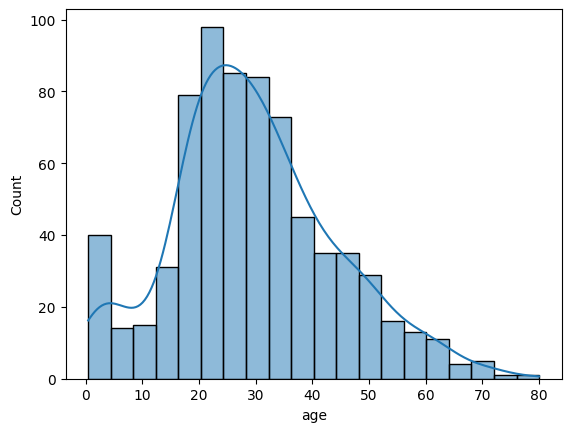

In [51]:
sns.histplot(df['age'], kde=1)

<AxesSubplot: xlabel='fare', ylabel='Count'>

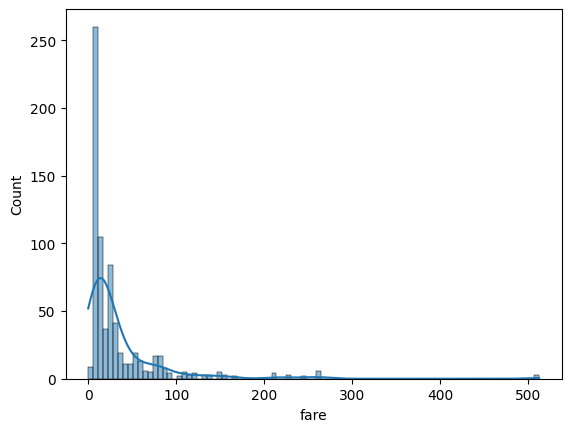

In [52]:
sns.histplot(df['fare'], kde=1)

In [62]:
print('AGE:')
print('Kurtosis:', df['age'].kurt())
print('Skewness:', df['age'].skew())

print('FARE:')
print('Kurtosis:', df['fare'].kurt())
print('Skewness:', df['fare'].skew())

AGE:
Kurtosis: 0.1782741536421022
Skewness: 0.38910778230082693
FARE:
Kurtosis: 30.9242490147161
Skewness: 4.6536303678277395


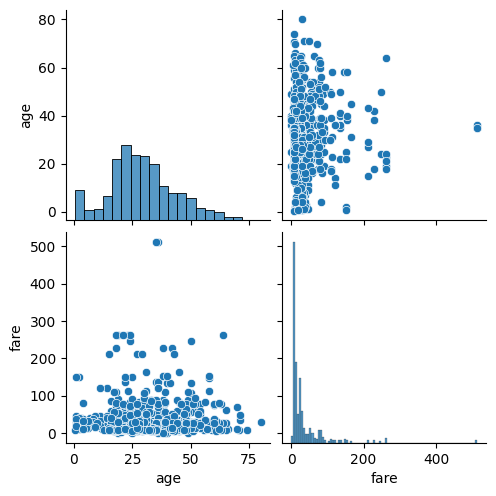

In [65]:
sns.pairplot(df, vars=['age','fare'])

In [67]:
from scipy import stats
stats.ttest_ind(df['age'],df['fare'])

Ttest_indResult(statistic=-2.4323860954527374, pvalue=0.015122045196375356)

In [68]:
stats.wilcoxon(df['age'],df['fare'])

WilcoxonResult(statistic=106276.0, pvalue=0.00017053938613400556)